In [85]:
#Importing Packages
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np

In [86]:
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

#____________________________________________________________________________________________________________
# Function to extract Product Price
def get_price(soup):
    try:
        price = soup.find("span", attrs={'class':'a-price-whole'}).text+soup.find("span", attrs={'class':'a-price-fraction'}).text
    except:
        price="np.NAN"
    return price

#____________________________________________________________________________________________________________
# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating
#____________________________________________________________________________________________________________
# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count
#____________________________________________________________________________________________________________
# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [87]:
%%time
# add your user agent 
HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

# The webpage URL
URL = "https://www.amazon.com/s?k=socks&crid=16TZ7XSAH0VDA&sprefix=socks%2Caps%2C232&ref=nb_sb_noss_2"

# HTTP Request
webpage = requests.get(URL, headers=HEADERS, verify=False)

# Soup Object containing all data
soup = BeautifulSoup(webpage.content, "html.parser")

# Fetch links as List of Tag Objects
links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

# Store the links
links_list = []

# Loop for extracting links from Tag Objects
for link in links:
        links_list.append(link.get('href'))

d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}

# Loop for extracting product details from each link 
for link in links_list:
    new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS, verify=False)

    new_soup = BeautifulSoup(new_webpage.content, "html.parser")

    # Function calls to display all necessary product information
    d['title'].append(get_title(new_soup))
    d['price'].append(get_price(new_soup))
    d['rating'].append(get_rating(new_soup))
    d['reviews'].append(get_review_count(new_soup))
    d['availability'].append(get_availability(new_soup))


amazon_df = pd.DataFrame.from_dict(d)
amazon_df['title'].replace('', np.nan, inplace=True)
amazon_df = amazon_df.dropna(subset=['title'])
# amazon_df.to_csv("/Users/e04140669/Desktop/amazon_data_2.csv", header=True, index=False)

C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\User

C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\User

C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\e04140669\AppData\Local\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\User

CPU times: total: 16.2 s
Wall time: 3min 33s


In [109]:
df=amazon_df.copy()

In [111]:
df['rating']=df['rating'].apply(lambda x: x[0:3])

In [114]:
df=df[df['rating']!='Pre']
df.sort_values(by='rating', ascending=False, inplace=True)
df['reviews']=df['reviews'].apply(lambda x: x.split()[0])
df_in_stock=df[df['availability']=='In Stock']

In [153]:
df_in_stock.head()

,title,price,rating,reviews,availability
19,K. Bell Socks Women's Fun Happy Hour Crew Sock...,8.98,4.8,"7,282",In Stock
49,Dickies Men's Dri-tech Moisture Control Quarte...,31.98,4.7,"22,113",In Stock
39,"Hanes Women's Value Socks, No Show Soft Moistu...",10.97,4.7,"24,132",In Stock
40,Fruit of the Loom Men's Dual Defense Ankle Soc...,15.49,4.7,"16,660",In Stock
8,Hanes womens Ultimate Comfort Toe Seamed Ankle...,10.73,4.7,"9,373",In Stock


In [157]:
df['review_num']=[int(val.replace(',', '')) for val in df['reviews']]

In [159]:
df.drop(columns=['reviews'], inplace=True)

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

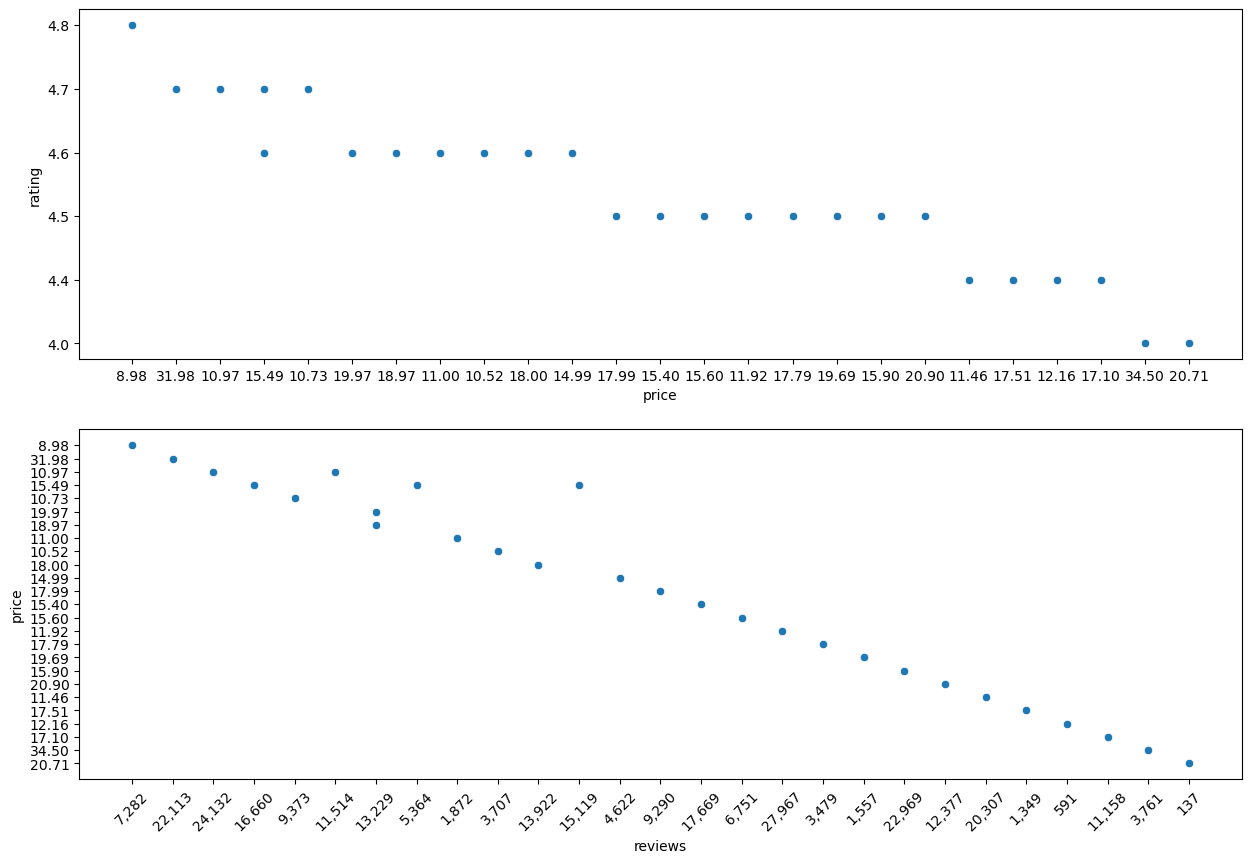

In [162]:
fig, axes=plt.subplots(2,1, figsize=(15,10))
sns.scatterplot(data=df_in_stock, x='price', y='rating', ax=axes[0])
sns.scatterplot(data=df_in_stock, x='reviews', y='price', ax=axes[1])
plt.xticks(rotation=45)
plt.show()

In [161]:
df_in_stock

,title,price,rating,reviews,availability
19,K. Bell Socks Women's Fun Happy Hour Crew Sock...,8.98,4.8,"7,282",In Stock
49,Dickies Men's Dri-tech Moisture Control Quarte...,31.98,4.7,"22,113",In Stock
39,"Hanes Women's Value Socks, No Show Soft Moistu...",10.97,4.7,"24,132",In Stock
40,Fruit of the Loom Men's Dual Defense Ankle Soc...,15.49,4.7,"16,660",In Stock
8,Hanes womens Ultimate Comfort Toe Seamed Ankle...,10.73,4.7,"9,373",In Stock
43,Hanes womens Ankle Soft Moisture Wicking Socks...,10.97,4.7,"11,514",In Stock
1,Gildan Men's Polyester Half Cushion Crew Socks...,19.97,4.6,"13,229",In Stock
35,Gildan Men's Polyester Half Cushion Crew Socks...,18.97,4.6,"13,229",In Stock
46,Fruit Of the Loom Men's Dual Defense Low Cut S...,15.49,4.6,"5,364",In Stock
24,"Hanes Men's Max Cushioned Ankle Socks, Multi-P...",11.00,4.6,"1,872",In Stock


In [163]:
df_in_stock.to_csv("/Users/e04140669/Desktop/amazon_data_final.csv", header=True, index=False)